x_data shape = (150, 4)
y_data shape = (150,)
x_data shape = (150, 2)
y_data shape = (150, 1)


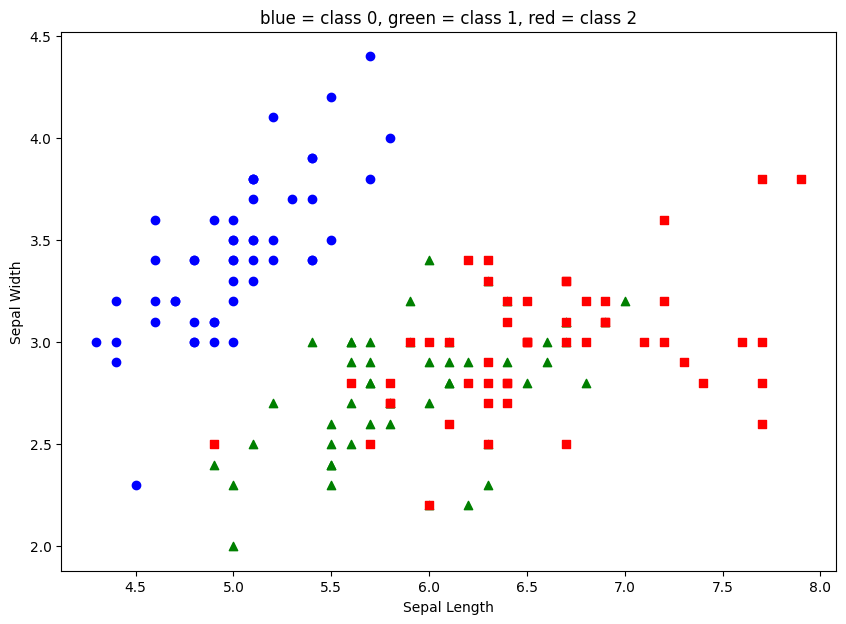

N = 150
inputs = 2
outputs = 1
W1 shape = (2, 10)
b1 shape = (10,)
W2 shape = (10, 1)
b2 shape = (1,)


In [1]:
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt # for plotting
from sklearn import datasets # for dataset
iris = datasets.load_iris() # load the data
x_data = iris.data # extract inputs
y_data = iris.target # extract outputs

# sanity check
print('x_data shape =', x_data.shape)
print('y_data shape =', y_data.shape)
x_data = x_data[:, 0:2] # only use first 2 features
y_data = y_data[:, np.newaxis] # add extra dimension

# sanity check
print('x_data shape =', x_data.shape)
print('y_data shape =', y_data.shape)

# plot
plt.figure(figsize=(10, 7))
plt.scatter(x_data[:50,0],
            x_data[:50,1],
            c='blue',
            marker='o') # class 0
plt.scatter(x_data[50:100,0],
            x_data[50:100,1],
            c='green',
            marker='^') # class 1
plt.scatter(x_data[100:,0],
            x_data[100:,1],
            c='red',
            marker='s') # class 2
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('blue = class 0, green = class 1, red = class 2')
plt.show()

# sigmoid
def sigm(x):
    return 1.0/(1.0 + np.exp(-x))

# sigmoid prime
def sigm_p(x):
    return sigm(x)*(1.0 - sigm(x))

epochs = 2000 # total number of epochs
neurons = 10 # number of neurons in the hidden layer
h = 0.0001 # step size for parameter update
# define network inputs and outputs
X = x_data # inputs
Y = y_data # outputs

# get dimensions
N = len(X) # number of data points
input_dim = len(X.T) # number of input features
output_dim = len(Y.T) # number of output features

# initialize network parameters
np.random.seed(0)
W1 = np.random.normal(size=(input_dim, neurons))
b1 = np.zeros(shape=neurons)
W2 = np.random.normal(size=(neurons, output_dim))
b2 = np.zeros(shape=output_dim)

# sanity check
print('N =',N)
print('inputs =',input_dim)
print('outputs =',output_dim)
print('W1 shape =',W1.shape)
print('b1 shape =',b1.shape)
print('W2 shape =',W2.shape)
print('b2 shape =',b2.shape)

# initialize empty lists
losses = [] # mean squared errors
accuracies = [] # correct / N

In [2]:
# train the network
for i in range(epochs):

    #
    # forward pass
    #

    # compute the loss
    z1 = np.dot(X, W1) + b1     # [N x neurons]
    y1 = sigm(z1)               # [N x neurons]
    z2 = np.dot(y1, W2) + b2    # [N x output_dim]
    r = z2 - Y                  # [N x output_dim]
    L = np.dot(r.T, r)/2.0      # [1 x 1]

    #
    # store relevant info
    #

    # round the predictions to obtain class labels
    predict = np.round(z2).clip(0, 3)

    # compute the error
    error = float(np.count_nonzero(predict-Y)) / float(N)

    # store the accuracy
    accuracies.append(1.0 - error)

    # store the loss
    losses.append(np.squeeze(L))

    #
    # backward pass
    #

    # partial derivatives
    dLdr = r                    # [N x output_dim]
    drdz2 = 1                   # [N x output_dim]
    dz2dW2 = y1                 # [N x neurons]
    dz2db2 = np.ones(shape = N) # [N, ]
    dz2dy1 = W2                 # [neurons x output_dim]
    dy1dz1 = sigm_p(z1)         # [N x neurons]
    dz1dW1 = X                  # [N x input_dim]
    dz1db1 = np.ones(shape = N) # [N, ]

    # chain rule
    dLdW2 = np.dot(dLdr.T, dz2dW2).T
    dLdb2 = np.dot(dLdr.T, dz2db2)
    dLdW1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1dW1).T
    dLdb1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1db1)

    # gradient update
    W2 = W2 - h*dLdW2
    b2 = b2 - h*dLdb2
    W1 = W1 - h*dLdW1
    b1 = b1 - h*dLdb1

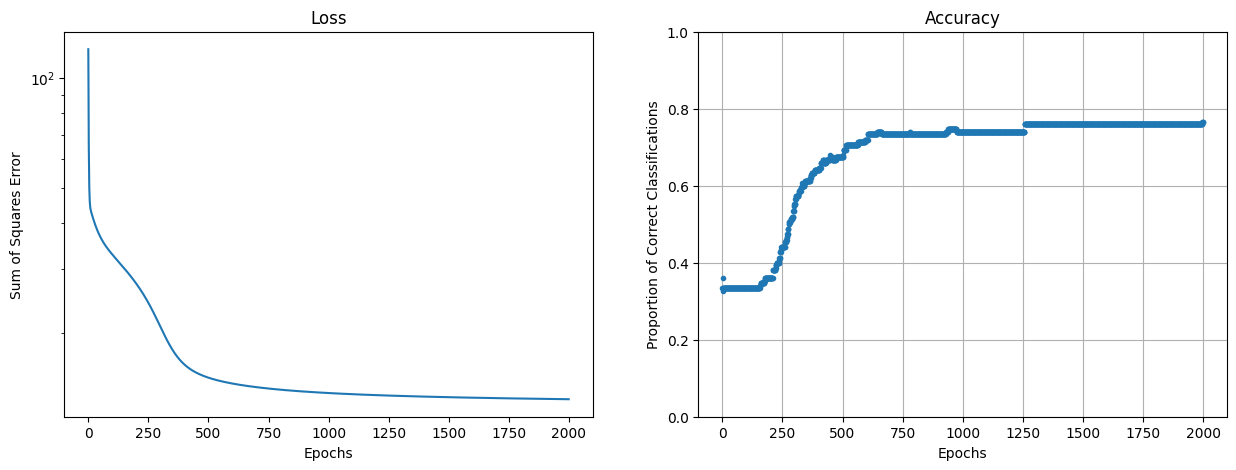

In [3]:
#Plot the loss and accuracy
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.semilogy(losses)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squares Error')

ax = fig.add_subplot(122)
plt.plot(accuracies,'.')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Proportion of Correct Classifications')
plt.ylim([0,1])
plt.grid()

plt.show()

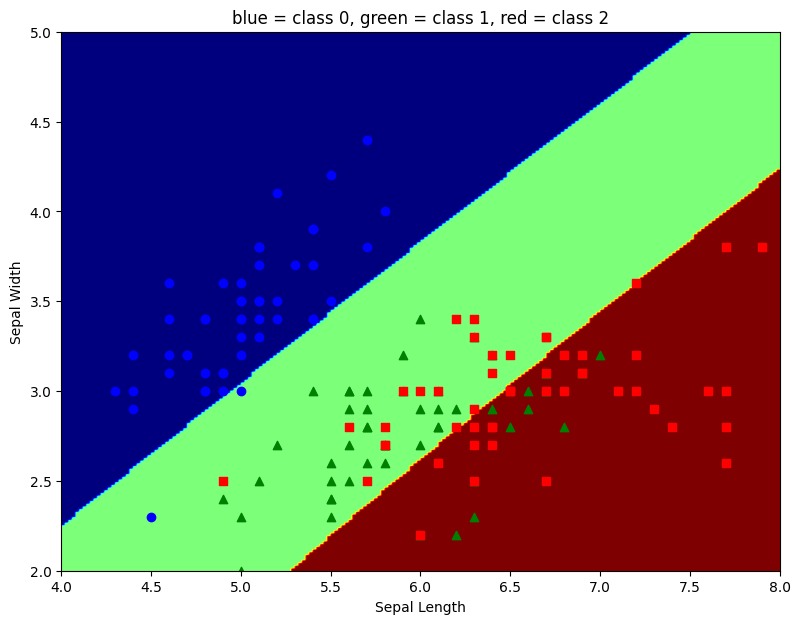

In [4]:
#Visualize the classification in 2d

# sepal length
l_min = np.floor(np.min(X[:,0]))
l_max = np.ceil(np.max(X[:,0]))

# sepal width
w_min = np.floor(np.min(X[:,1]))
w_max = np.ceil(np.max(X[:,1]))

# make a linspace
num_pts = 200
sepal_length = np.linspace(l_min,l_max,num_pts)
sepal_width = np.linspace(w_min,w_max,num_pts)

# convert to mesh
[l_mesh,w_mesh] = np.meshgrid(sepal_length,sepal_width)

# create ordered pairs
l_mesh = l_mesh.reshape(-1)[:,np.newaxis]
w_mesh = w_mesh.reshape(-1)[:,np.newaxis]
X_mesh = np.concatenate([l_mesh,w_mesh],axis=1)
y_mesh = np.round(np.dot(sigm(np.dot(X_mesh,W1)+b1),W2)+b2)

# reshape back into 2d
L_mesh = l_mesh.reshape(num_pts,num_pts)
W_mesh = w_mesh.reshape(num_pts,num_pts)
Y_mesh = np.minimum(2,np.maximum(0,y_mesh.reshape(num_pts,num_pts)))

# plot
plt.figure(figsize=(10, 7))
plt.imshow(np.flipud(Y_mesh), extent=[l_min,l_max,w_min,w_max], cmap='jet')
plt.scatter(x_data[:50,0], x_data[:50,1], c='blue', marker='o') # class 0
plt.scatter(x_data[50:100,0], x_data[50:100,1], c='green', marker='^') # class 1
plt.scatter(x_data[100:,0], x_data[100:,1], c='red', marker='s') # class 2
plt.title('blue = class 0, green = class 1, red = class 2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(4, 8)
plt.ylim(2, 5)
plt.show()

Each of the 3 classes has 50 data points. I will create 5 different train/val/test splits for performing 5-fold cross validation. Each data set will have 30 training, 10 validation, and 10 test points. I will use this splits to perform 5-fold cross validation to select the optimal number of neurons in the hidden layer, ranging from 1 to 20. To do this, I will make a plot of the mean validation error over the 5 splits and select the number of neurons corresponding to the lowest mean validation error.

(90, 2)
(30, 2)
(30, 2)
(90, 1)
(30, 1)
(30, 1)


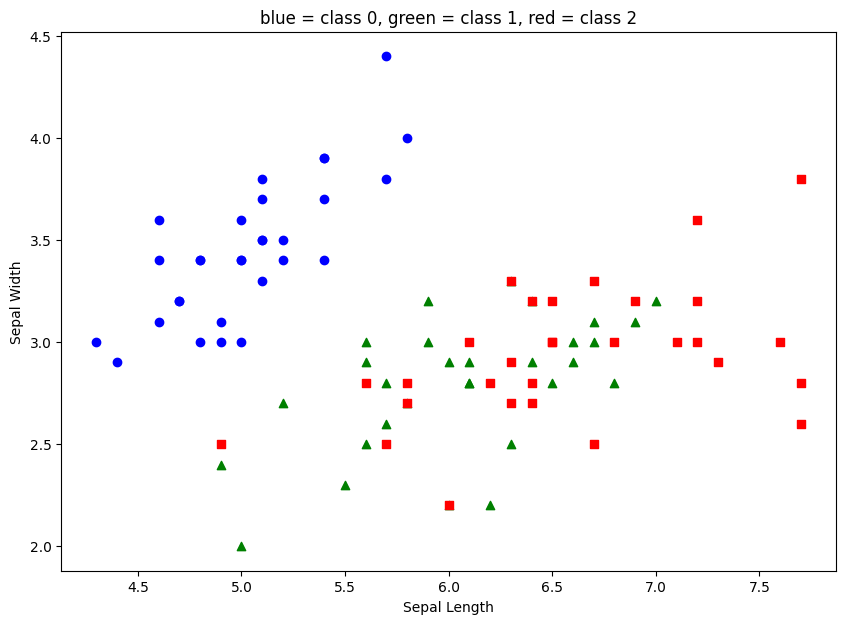

In [5]:
class1xdat = x_data[:50,:]
class2xdat = x_data[50:100,:]
class3xdat = x_data[100:,:]
class1ydat = y_data[:50,:]
class2ydat = y_data[50:100,:]
class3ydat = y_data[100:,:]

x_data_train_cross = []
x_data_val_cross = []
x_data_test_cross = []
y_data_train_cross = []
y_data_val_cross = []
y_data_test_cross = []

for i in range(5):
  class1xdat_train = np.roll(class1xdat,10*i,axis=0)[:30,:]
  class1xdat_val = np.roll(class1xdat,10*i,axis=0)[30:40,:]
  class1xdat_test = np.roll(class1xdat,10*i,axis=0)[40:,:]
  class2xdat_train = np.roll(class2xdat,10*i,axis=0)[:30,:]
  class2xdat_val = np.roll(class2xdat,10*i,axis=0)[30:40,:]
  class2xdat_test = np.roll(class2xdat,10*i,axis=0)[40:,:]
  class3xdat_train = np.roll(class3xdat,10*i,axis=0)[:30,:]
  class3xdat_val = np.roll(class3xdat,10*i,axis=0)[30:40,:]
  class3xdat_test = np.roll(class3xdat,10*i,axis=0)[40:,:]
  xdat_train = np.concatenate((class1xdat_train,class2xdat_train,class3xdat_train),axis=0)
  xdat_val = np.concatenate((class1xdat_val,class2xdat_val,class3xdat_val),axis=0)
  xdat_test = np.concatenate((class1xdat_test,class2xdat_test,class3xdat_test),axis=0)
  x_data_train_cross.append(xdat_train)
  x_data_val_cross.append(xdat_val)
  x_data_test_cross.append(xdat_test)
  class1ydat_train = np.roll(class1ydat,10*i,axis=0)[:30,:]
  class1ydat_val = np.roll(class1ydat,10*i,axis=0)[30:40,:]
  class1ydat_test = np.roll(class1ydat,10*i,axis=0)[40:,:]
  class2ydat_train = np.roll(class2ydat,10*i,axis=0)[:30,:]
  class2ydat_val = np.roll(class2ydat,10*i,axis=0)[30:40,:]
  class2ydat_test = np.roll(class2ydat,10*i,axis=0)[40:,:]
  class3ydat_train = np.roll(class3ydat,10*i,axis=0)[:30,:]
  class3ydat_val = np.roll(class3ydat,10*i,axis=0)[30:40,:]
  class3ydat_test = np.roll(class3ydat,10*i,axis=0)[40:,:]
  ydat_train = np.concatenate((class1ydat_train,class2ydat_train,class3ydat_train),axis=0)
  ydat_val = np.concatenate((class1ydat_val,class2ydat_val,class3ydat_val),axis=0)
  ydat_test = np.concatenate((class1ydat_test,class2ydat_test,class3ydat_test),axis=0)
  y_data_train_cross.append(ydat_train)
  y_data_val_cross.append(ydat_val)
  y_data_test_cross.append(ydat_test)

#print the shapes of the 1st of 5 total train/val/test
#cross-validation sets and corresponding labels
print(np.shape(x_data_train_cross[0]))
print(np.shape(x_data_val_cross[0]))
print(np.shape(x_data_test_cross[0]))
print(np.shape(y_data_train_cross[0]))
print(np.shape(y_data_val_cross[0]))
print(np.shape(y_data_test_cross[0]))

# plot the 1st split
split=0
plt.figure(figsize=(10, 7))
plt.scatter(x_data_train_cross[split][:30,0],
            x_data_train_cross[split][:30,1],
            c='blue',
            marker='o') # class 0
plt.scatter(x_data_train_cross[split][30:60,0],
            x_data_train_cross[split][30:60,1],
            c='green',
            marker='^') # class 1
plt.scatter(x_data_train_cross[split][60:,0],
            x_data_train_cross[split][60:,1],
            c='red',
            marker='s') # class 2
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('blue = class 0, green = class 1, red = class 2')
plt.show()


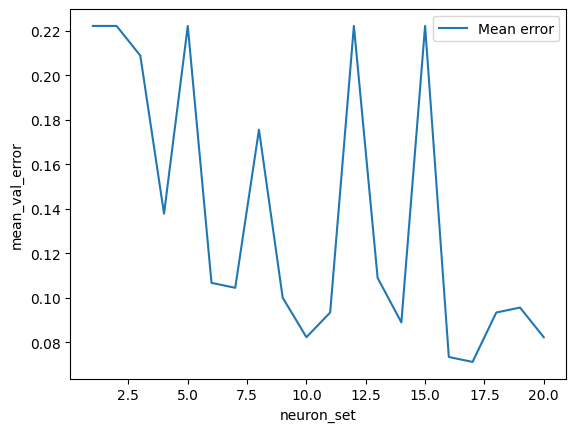

17


In [6]:
mean_val_error=[]
split_set=np.arange(0,5)
neuron_set=np.arange(1,21)
epochs=2000
h=0.0001
for i in range(20):
    neurons=neuron_set[i]
    error=[]
    for j in range(5):
        split=split_set[j]
        X = x_data_train_cross[split] # inputs
        Y = y_data_train_cross[split]  # outputs

        # get dimensions
        N = len(X) # number of data points
        input_dim = len(X.T) # number of input features
        output_dim = len(Y.T) # number of output features

       # initialize network parameters
        np.random.seed(0)
        W1 = np.random.normal(size=(input_dim, neurons))
        b1 = np.zeros(shape=neurons)
        W2 = np.random.normal(size=(neurons, output_dim))
        b2 = np.zeros(shape=output_dim)

        # train the network
        for k in range(epochs):

            #
            # forward pass
            #

            # compute the loss
            z1 = np.dot(X, W1) + b1     # [N x neurons]
            y1 = sigm(z1)               # [N x neurons]
            z2 = np.dot(y1, W2) + b2    # [N x output_dim]
            r = z2 - Y                  # [N x output_dim]
            L = np.dot(r.T, r)/2.0      # [1 x 1]



            # partial derivatives
            dLdr = r                    # [N x output_dim]
            drdz2 = 1                   # [N x output_dim]
            dz2dW2 = y1                 # [N x neurons]
            dz2db2 = np.ones(shape = N) # [N, ]
            dz2dy1 = W2                 # [neurons x output_dim]
            dy1dz1 = sigm_p(z1)         # [N x neurons]
            dz1dW1 = X                  # [N x input_dim]
            dz1db1 = np.ones(shape = N) # [N, ]

            # chain rule
            dLdW2 = np.dot(dLdr.T, dz2dW2).T
            dLdb2 = np.dot(dLdr.T, dz2db2)
            dLdW1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1dW1).T
            dLdb1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1db1)

            # gradient update
            W2 = W2 - h*dLdW2
            b2 = b2 - h*dLdb2
            W1 = W1 - h*dLdW1
            b1 = b1 - h*dLdb1

        predict = np.round(np.dot(sigm(np.dot(x_data_val_cross[split],W1)+b1),W2)+b2).clip(0,3)
        error.append(float(np.count_nonzero(predict-y_data_val_cross[split]))/float(N))
    mean_val_error.append(np.mean(error))



plt.plot(neuron_set, mean_val_error, label = 'Mean error')


plt.legend()
plt.xlabel('neuron_set')
plt.ylabel('mean_val_error')
plt.show()
optimal_neurons=np.argmin(mean_val_error,axis=0)+1
print(optimal_neurons)


In [7]:
mean_val_error=[]
split_set=np.arange(0,5)
neurons=17
error=[]
for j in range(5):
        split=split_set[j]
        X = x_data_train_cross[split] # inputs
        Y = y_data_train_cross[split]  # outputs

        # get dimensions
        N = len(X) # number of data points
        input_dim = len(X.T) # number of input features
        output_dim = len(Y.T) # number of output features

       # initialize network parameters
        np.random.seed(0)
        W1 = np.random.normal(size=(input_dim, neurons))
        b1 = np.zeros(shape=neurons)
        W2 = np.random.normal(size=(neurons, output_dim))
        b2 = np.zeros(shape=output_dim)

        # train the network
        for k in range(epochs):

            # compute the loss
            z1 = np.dot(X, W1) + b1     # [N x neurons]
            y1 = sigm(z1)               # [N x neurons]
            z2 = np.dot(y1, W2) + b2    # [N x output_dim]
            r = z2 - Y                  # [N x output_dim]
            L = np.dot(r.T, r)/2.0      # [1 x 1]



            # partial derivatives
            dLdr = r                    # [N x output_dim]
            drdz2 = 1                   # [N x output_dim]
            dz2dW2 = y1                 # [N x neurons]
            dz2db2 = np.ones(shape = N) # [N, ]
            dz2dy1 = W2                 # [neurons x output_dim]
            dy1dz1 = sigm_p(z1)         # [N x neurons]
            dz1dW1 = X                  # [N x input_dim]
            dz1db1 = np.ones(shape = N) # [N, ]

            # chain rule
            dLdW2 = np.dot(dLdr.T, dz2dW2).T
            dLdb2 = np.dot(dLdr.T, dz2db2)
            dLdW1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1dW1).T
            dLdb1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1db1)

            # gradient update
            W2 = W2 - h*dLdW2
            b2 = b2 - h*dLdb2
            W1 = W1 - h*dLdW1
            b1 = b1 - h*dLdb1

        predict = np.round(np.dot(sigm(np.dot(x_data_test_cross[split],W1)+b1),W2)+b2).clip(0,3)
        error.append(float(np.count_nonzero(predict-y_data_test_cross[split]))/float(N))

mean_val_error.append(np.mean(error))



print(mean_val_error)


[0.07333333333333333]


Next, I will implement a mini-batch version of SGD and use 5-fold cross validation as in problem 1 to choose the optimal batch size, using batch sizes 1, 5, 10, 30, 60, and 90. Note that the definition of epoch is equal to one iteration over the total size of the training set, train for 2000 epochs for each batch size.

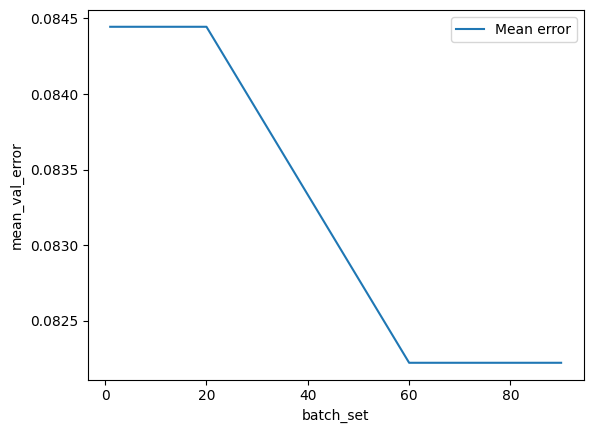

5


In [8]:
mean_val_error=[]
split_set=np.arange(0,5)
batch_set=np.array([1,5,10,20,60,90])
epochs=2000
h=0.0001
neurons=10#optimal neuron
for i in range(6):
    batches=batch_set[i]
    error=[]
    for j in range(5):
        split=split_set[j]
        X = x_data_train_cross[split] # inputs
        Y = y_data_train_cross[split]  # outputs

        # get dimensions
        N = len(X) # number of data points
        input_dim = len(X.T) # number of input features
        output_dim = len(Y.T) # number of output features

       # initialize network parameters
        np.random.seed(0)
        W1 = np.random.normal(size=(input_dim, neurons))
        b1 = np.zeros(shape=neurons)
        W2 = np.random.normal(size=(neurons, output_dim))
        b2 = np.zeros(shape=output_dim)

        # train the network
        for k in range(epochs):
            X,Y=shuffle(X,Y)
            for m in range(0,N,batches):
                X_sub=X[m:m+batches,:]
                Y_sub=Y[m:m+batches,:]
                N_sub=len(X_sub)



                # compute the loss
                z1 = np.dot(X_sub, W1) + b1     # [N x neurons]
                y1 = sigm(z1)               # [N x neurons]
                z2 = np.dot(y1, W2) + b2    # [N x output_dim]
                r = z2 - Y_sub                  # [N x output_dim]
                L = np.dot(r.T, r)/2.0      # [1 x 1]



                # partial derivatives
                dLdr = r                    # [N x output_dim]
                drdz2 = 1                   # [N x output_dim]
                dz2dW2 = y1                 # [N x neurons]
                dz2db2 = np.ones(shape = N_sub) # [N, ]
                dz2dy1 = W2                 # [neurons x output_dim]
                dy1dz1 = sigm_p(z1)         # [N x neurons]
                dz1dW1 = X_sub                  # [N x input_dim]
                dz1db1 = np.ones(shape = N_sub) # [N, ]

                # chain rule
                dLdW2 = np.dot(dLdr.T, dz2dW2).T
                dLdb2 = np.dot(dLdr.T, dz2db2)
                dLdW1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1dW1).T
                dLdb1 = np.dot((np.dot(dLdr, dz2dy1.T)*dy1dz1).T, dz1db1)

                # gradient update
                W2 = W2 - h*dLdW2
                b2 = b2 - h*dLdb2
                W1 = W1 - h*dLdW1
                b1 = b1 - h*dLdb1

        predict = np.round(np.dot(sigm(np.dot(x_data_val_cross[split],W1)+b1),W2)+b2).clip(0,3)
        error.append(float(np.count_nonzero(predict-y_data_val_cross[split]))/float(N))
    mean_val_error.append(np.mean(error))



plt.plot(batch_set, mean_val_error, label = 'Mean error')


plt.legend()
plt.xlabel('batch_set')
plt.ylabel('mean_val_error')
plt.show()
optimal_batch=np.argmin(mean_val_error,axis=0)+1
print(optimal_batch)


I add 2nd hidden layer and compute/code-up the gradients analytically for backpropagation, using 10 neurons with sigmoid activations for each layer and a batch size of 90 for training. The same weight initialization will be used for the 2nd layer.

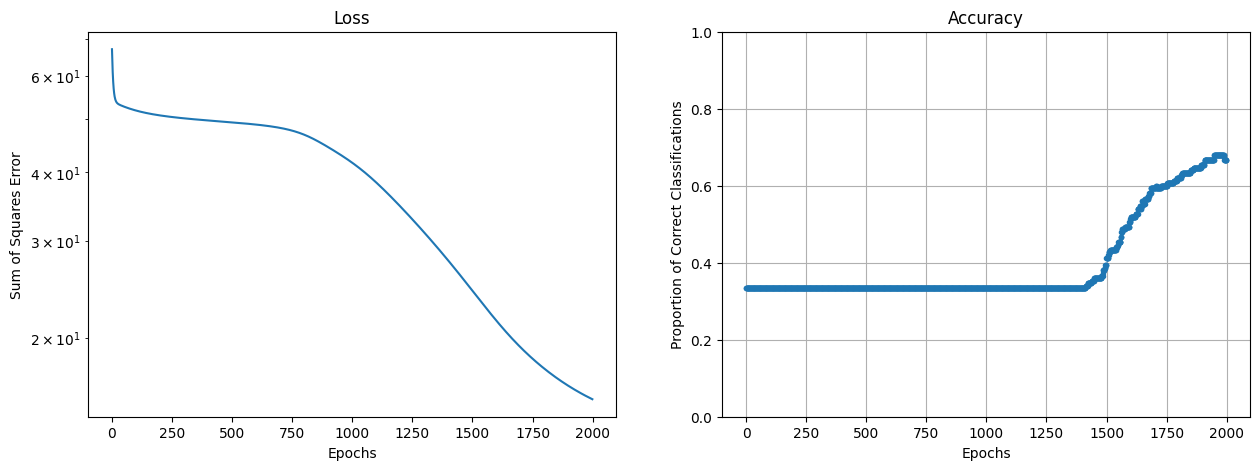

In [9]:
np.random.seed(0)
epochs = 2000 # total number of epochs
neurons = 10 # number of neurons in the hidden layer
losses=[]
accuracies=[]
h = 0.0001 # step size for parameter update
X = x_data # inputs
Y = y_data # outputs

# get dimensions
N = len(X) # number of data points
input_dim = len(X.T) # number of input features
output_dim = len(Y.T) # number of output features

# initialize network parameters
np.random.seed(0)
W1 = np.random.normal(size=(input_dim, neurons))
b1 = np.zeros(shape=neurons)
W2 = np.random.normal(size=(neurons, neurons))
b2 = np.zeros(shape=neurons)
W3 = np.random.normal(size=(neurons, output_dim))
b3 = np.zeros(shape=output_dim)
batches=90

for k in range(epochs):
    a=np.dot(sigm(np.dot(sigm(np.dot(X,W1)+b1),W2)+b2),W3)+b3
    diff=a-Y
    L1=np.dot(diff.T,diff)/2.0
    predict=np.round(a).clip(0,3)
    error=float(np.count_nonzero(predict-Y))/float(N)
    accuracies.append(1.0-error)
    losses.append(np.squeeze(L1))
    X,Y=shuffle(X,Y)
    for m in range(0,N,batches):
        X_sub=X[m:m+batches,:]
        Y_sub=Y[m:m+batches,:]
        N_sub=len(X_sub)



        z1 = np.dot(X_sub, W1) + b1     # [N x neurons]
        y1 = sigm(z1)               # [N x neurons]
        z2 = np.dot(y1, W2) + b2    # [N x neurons]
        y2=sigm(z2)                  #[Nxneurons]
        z3=np.dot(y2,W3)+b3           # [N x output_dim]
        r = z3 - Y_sub                  # [N x output_dim]
        L = np.dot(r.T, r)/2.0      # [1 x 1]



        # partial derivatives
        dLdr = r                    # [N x output_dim]
        drdz3 = 1                   # [N x output_dim]
        dz3dW3 = y2                 # [N x neurons]
        dz3db3 = np.ones(shape = N_sub) # [N, ]
        dz3dy2 = W3                 # [neurons x output_dim]
        dy2dz2 = sigm_p(z2)         # [N x neurons]
        dz2dW2 = y1                 # [N x neurons]
        dz2db2 = np.ones(shape = N_sub) # [N, ]
        dz2dy1=W2  #neurons x neurons
        dy1dz1=sigm_p(z1)  #N x neurons
        dz1dW1=X_sub #N x input_dim
        dz1db1=np.ones(shape = N_sub) # [N, ]

        # chain rule
        dLdW3 = np.dot(dLdr.T, dz3dW3).T
        dLdb3 = np.dot(dLdr.T, dz3db3)
        dLdW2 = np.dot((np.dot(dLdr, dz3dy2.T)*dy2dz2).T, dz2dW2).T
        dLdb2 = np.dot((np.dot(dLdr, dz3dy2.T)*dy2dz2).T, dz2db2)
        dLdW1=np.dot((np.dot(np.dot(dLdr,dz3dy2.T)*dy2dz2,dz2dy1.T)*dy1dz1).T,dz1dW1).T
        dLdb1=np.dot((np.dot(np.dot(dLdr,dz3dy2.T)*dy2dz2,dz2dy1.T)*dy1dz1).T,dz1db1)

        # gradient update
        W2 = W2 - h*dLdW2
        b2 = b2 - h*dLdb2
        W1 = W1 - h*dLdW1
        b1 = b1 - h*dLdb1
        W3=W3 - h*dLdW3
        b3 = b3 - h*dLdb3



#Plot the loss and accuracy
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.semilogy(losses)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squares Error')

ax = fig.add_subplot(122)
plt.plot(accuracies,'.')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Proportion of Correct Classifications')
plt.ylim([0,1])
plt.grid()

plt.show()



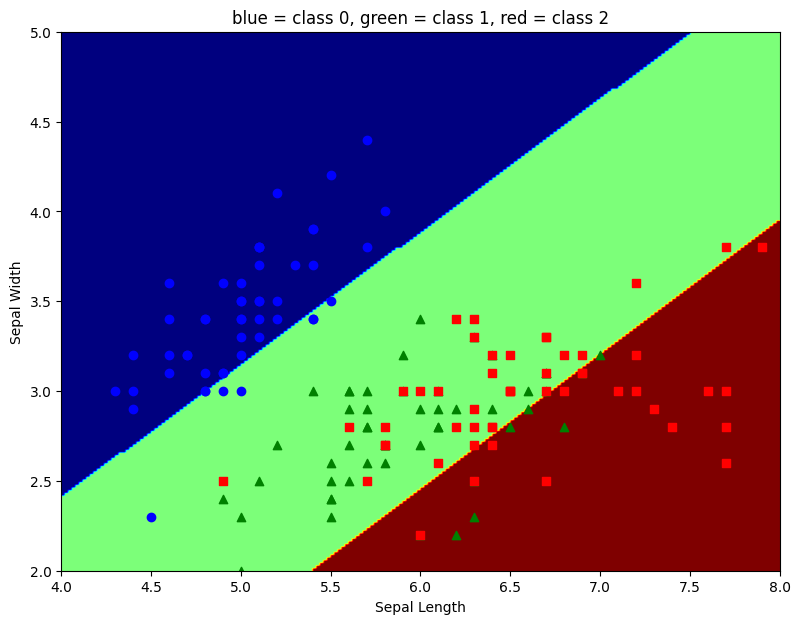

In [10]:
#Visualize the classification in 2d

# sepal length
l_min = np.floor(np.min(X[:,0]))
l_max = np.ceil(np.max(X[:,0]))

# sepal width
w_min = np.floor(np.min(X[:,1]))
w_max = np.ceil(np.max(X[:,1]))

# make a linspace
num_pts = 200
sepal_length = np.linspace(l_min,l_max,num_pts)
sepal_width = np.linspace(w_min,w_max,num_pts)

# convert to mesh
[l_mesh,w_mesh] = np.meshgrid(sepal_length,sepal_width)

# create ordered pairs
l_mesh = l_mesh.reshape(-1)[:,np.newaxis]
w_mesh = w_mesh.reshape(-1)[:,np.newaxis]
X_mesh = np.concatenate([l_mesh,w_mesh],axis=1)
y_mesh = np.round(np.dot(sigm(np.dot(sigm(np.dot(X_mesh,W1)+b1),W2)+b2),W3)+b3)

# reshape back into 2d
L_mesh = l_mesh.reshape(num_pts,num_pts)
W_mesh = w_mesh.reshape(num_pts,num_pts)
Y_mesh = np.minimum(2,np.maximum(0,y_mesh.reshape(num_pts,num_pts)))

# plot
plt.figure(figsize=(10, 7))
plt.imshow(np.flipud(Y_mesh), extent=[l_min,l_max,w_min,w_max], cmap='jet')
plt.scatter(x_data[:50,0], x_data[:50,1], c='blue', marker='o') # class 0
plt.scatter(x_data[50:100,0], x_data[50:100,1], c='green', marker='^') # class 1
plt.scatter(x_data[100:,0], x_data[100:,1], c='red', marker='s') # class 2
plt.title('blue = class 0, green = class 1, red = class 2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(4, 8)
plt.ylim(2, 5)
plt.show()

I start from the original example code from above for this problem, only use 1 hidden layer, 10 nuerons, sigmoid activations, a batch size of 150, etc. I convert the output classes into a one-hot encoding and modify the network accordingly, i.e., 3 neurons in the output layer with a softmax. I also change the loss function to a categorical cross entropy loss. Finally, I will plot the training loss and accuracy.

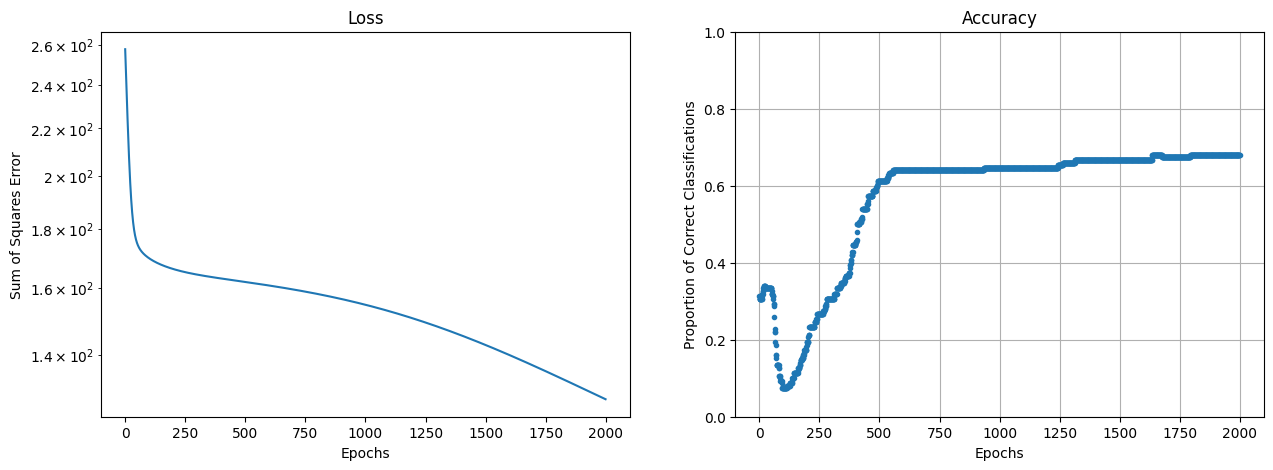

In [11]:
from scipy.special import softmax
from tensorflow.keras.utils import to_categorical
def cross_entropy(p,q):
    return -sum([np.dot(p[i],np.log(q[i])) for i in range(len(p))])



epochs = 2000 # total number of epochs
neurons = 10 # number of neurons in the hidden layer
h = 0.0001 # step size for parameter update
# define network inputs and outputs
X = x_data # inputs
Y = y_data # outputs

# get dimensions
N = len(X) # number of data points
input_dim = len(X.T) # number of input features
output_dim = 3 # number of output features

# initialize network parameters
np.random.seed(0)
W1 = np.random.normal(size=(input_dim, neurons))
b1 = np.zeros(shape=neurons)
W2 = np.random.normal(size=(neurons, output_dim))
b2 = np.zeros(shape=output_dim)


onehot=to_categorical(Y)

losses = [] # mean squared errors
accuracies = [] # correct / N

# train the network
for i in range(epochs):

    #
    # forward pass
    #

    # compute the loss
    z1 = np.dot(X, W1) + b1     # [N x neurons]
    y1 = sigm(z1)               # [N x neurons]
    z2 = np.dot(y1, W2) + b2    # [N x output_dim]
    y2=softmax(z2,axis=1)
    L = cross_entropy(onehot,y2)     # [1 x 1]


    # round the predictions to obtain class labels
    predict = np.reshape(np.argmax(y2, axis=1), (N,1))

    # compute the error
    error = float(np.count_nonzero(predict-Y)) / float(N)

    # store the accuracy
    accuracies.append(1.0 - error)

    # store the loss
    losses.append(np.squeeze(L))

    #
    # backward pass
    #

    # partial derivatives
    dLdz2=y2-onehot;
    dz2dW2 = y1                 # [N x neurons]
    dz2db2 = np.ones(shape = N) # [N, ]
    dz2dy1 = W2                 # [neurons x output_dim]
    dy1dz1 = sigm_p(z1)         # [N x neurons]
    dz1dW1 = X                  # [N x input_dim]
    dz1db1 = np.ones(shape = N) # [N, ]

    # chain rule
    dLdW2 = np.dot(dLdz2.T, dz2dW2).T
    dLdb2 = np.dot(dLdz2.T, dz2db2)
    dLdW1 = np.dot((np.dot(dLdz2, dz2dy1.T)*dy1dz1).T, dz1dW1).T
    dLdb1 = np.dot((np.dot(dLdz2, dz2dy1.T)*dy1dz1).T, dz1db1)

    # gradient update
    W2 = W2 - h*dLdW2
    b2 = b2 - h*dLdb2
    W1 = W1 - h*dLdW1
    b1 = b1 - h*dLdb1

#Plot the loss and accuracy
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.semilogy(losses)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squares Error')

ax = fig.add_subplot(122)
plt.plot(accuracies,'.')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Proportion of Correct Classifications')
plt.ylim([0,1])
plt.grid()

plt.show()

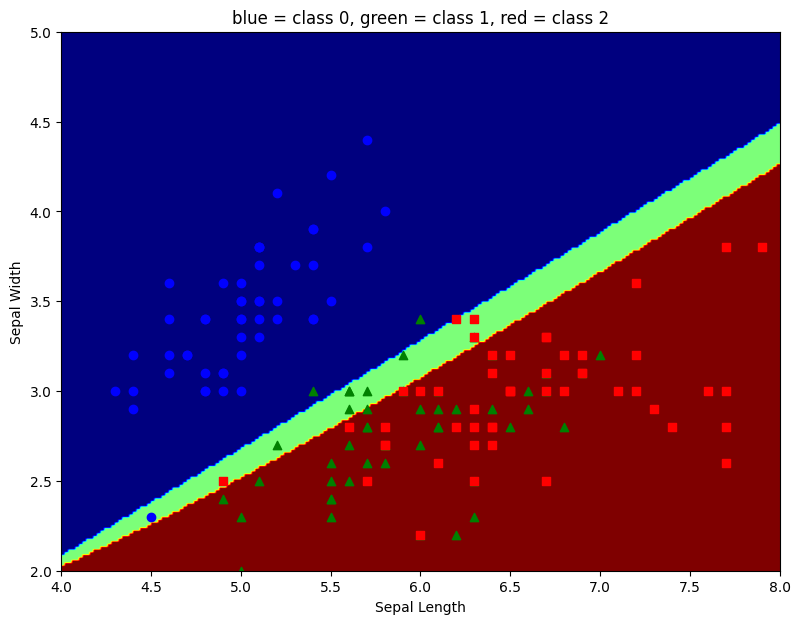

In [12]:
#Visualize the classification in 2d

# sepal length
l_min = np.floor(np.min(X[:,0]))
l_max = np.ceil(np.max(X[:,0]))

# sepal width
w_min = np.floor(np.min(X[:,1]))
w_max = np.ceil(np.max(X[:,1]))

# make a linspace
num_pts = 200
sepal_length = np.linspace(l_min,l_max,num_pts)
sepal_width = np.linspace(w_min,w_max,num_pts)

# convert to mesh
[l_mesh,w_mesh] = np.meshgrid(sepal_length,sepal_width)

# create ordered pairs
l_mesh = l_mesh.reshape(-1)[:,np.newaxis]
w_mesh = w_mesh.reshape(-1)[:,np.newaxis]
X_mesh = np.concatenate([l_mesh,w_mesh],axis=1)
y_mesh = np.argmax(softmax(np.dot(sigm(np.dot(X_mesh,W1)+b1),W2)+b2, axis=1),axis=1)

# reshape back into 2d
L_mesh = l_mesh.reshape(num_pts,num_pts)
W_mesh = w_mesh.reshape(num_pts,num_pts)
Y_mesh = np.minimum(2,np.maximum(0,y_mesh.reshape(num_pts,num_pts)))

# plot
plt.figure(figsize=(10, 7))
plt.imshow(np.flipud(Y_mesh), extent=[l_min,l_max,w_min,w_max], cmap='jet')
plt.scatter(x_data[:50,0], x_data[:50,1], c='blue', marker='o') # class 0
plt.scatter(x_data[50:100,0], x_data[50:100,1], c='green', marker='^') # class 1
plt.scatter(x_data[100:,0], x_data[100:,1], c='red', marker='s') # class 2
plt.title('blue = class 0, green = class 1, red = class 2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(4, 8)
plt.ylim(2, 5)
plt.show()